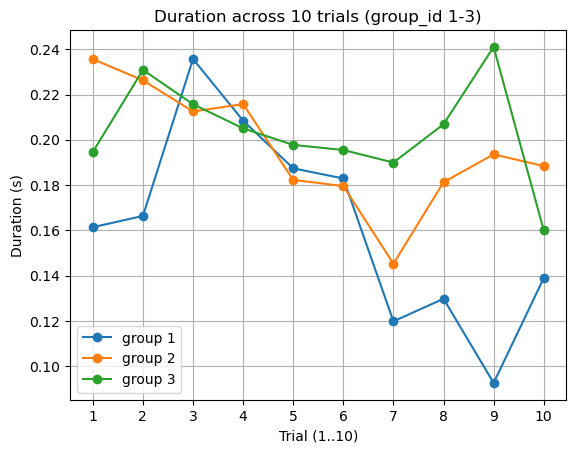

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "test_log.db"
TABLE_NAME = "vib_test"

# Load data from SQLite
with sqlite3.connect(DB_PATH) as con:
    df = pd.read_sql_query(
        f"""
        SELECT group_id, trial_index, duration
        FROM {TABLE_NAME}
        WHERE group_id IN (1,2,3)
        ORDER BY group_id, trial_index
        """,
        con,
    )

# Basic cleanup: keep first 10 trials per group (if more exist)
df = df[df["trial_index"].between(1, 10)].copy()

# Plot: duration vs trial index for group_id 1..3
plt.figure()
for gid, g in df.groupby("group_id"):
    g = g.sort_values("trial_index")
    plt.plot(g["trial_index"], g["duration"], marker="o", label=f"group {gid}")

plt.xlabel("Trial (1..10)")
plt.ylabel("Duration (s)")
plt.title("Duration across 10 trials (group_id 1-3)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()